<a href="https://colab.research.google.com/github/hrishikreddy/Smart-Attendance-Tracker---Face-Recognition/blob/main/miniproject_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vasukipatel/face-recognition-dataset")

print("Path to dataset files:", path)

100%|██████████| 726M/726M [00:07<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.5 MB/s eta 0:00:00


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pkg_resources
mtcnn_version = pkg_resources.get_distribution("mtcnn").version
print(mtcnn_version)

1.0.0


<ipython-input-5-8dcb24207c5d>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
import numpy as np
import pandas as pd
import cv2
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image


import os
print(os.listdir('/content'))

['.config', 'drive', 'sample_data']


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/1.jpg')

if img is None:
    print("Error: Image not found at the specified path.")
else:

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    plt.imshow(img_rgb, cmap='gray', interpolation='bicubic')

    plt.show()


    print("Image shape:", img.shape)

Error: Image not found at the specified path.


In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=4d971f0c84be63b7e6d8be393a4a9b085af43036143a49f53731aac8e397e20d
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


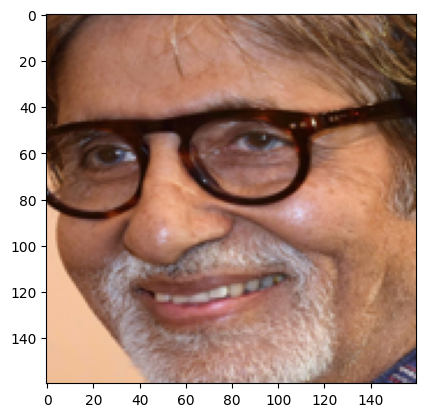

(160, 160, 3)


In [ ]:
def extract_face(filename, required_size=(160, 160)):

    image = Image.open(filename)

    image = image.convert('RGB')

    pixels = np.asarray(image)

    detector = MTCNN()

    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array


pixels = extract_face('/content/1.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

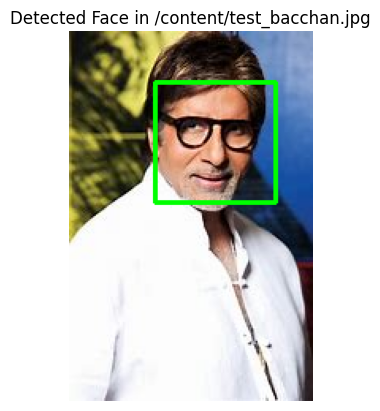

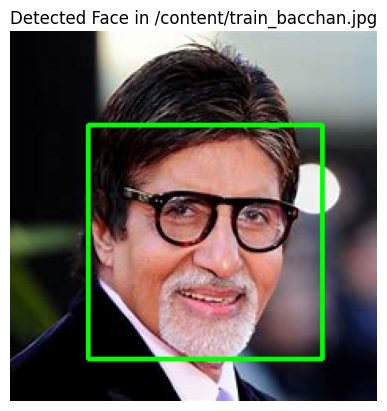

[{'embedding': [0.054464083164930344, -0.0595606230199337, -0.12717853486537933, -0.019206419587135315, 0.06426170468330383, 0.11450907588005066, -0.04380885511636734, 0.00383348879404366, -0.0758117213845253, -0.1097000241279602, -0.021153263747692108, 0.11286018043756485, -0.004363538231700659, -0.17072096467018127, -0.15392987430095673, -0.07113350927829742, -0.10369440168142319, -0.007265273481607437, -0.010698703117668629, 0.18151764571666718, 0.061799850314855576, -0.060997311025857925, 0.06952432543039322, 0.09437276422977448, -0.018913911655545235, 0.12008348107337952, 0.09974338114261627, -0.18663284182548523, -0.025751406326889992, -0.07454831898212433, -0.015240511856973171, -0.09538833051919937, -0.09046181291341782, 0.040203697979450226, -0.0017792679136618972, -0.012826569378376007, -0.07199729233980179, 0.09181459993124008, -0.061943888664245605, -0.08357717096805573, 0.07958707213401794, -0.040497612208127975, -0.05131830275058746, 0.23949366807937622, -0.16268815100193

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Image paths (Replace with actual images)
image1_path = "/content/test_bacchan.jpg"
image2_path = "/content/train_bacchan.jpg"

# Models that work with TensorFlow 2.18
models = ["OpenFace", "Facenet", "OpenFace", "DeepFace"]

# Step 1: Face Detection
def detect_face(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print(f"No face detected in {image_path}")
        return None, img

    # Draw rectangle around the face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show detected face
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Detected Face in {image_path}")
    plt.show()

    return faces, img

# Detect faces
detect_face(image1_path)
detect_face(image2_path)

# Step 2: Extract embeddings and normalize sizes
def get_combined_embedding(image_path):
    embeddings = []
    embedding_sizes = []

    for model in models:
        try:
            result = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=True)
            print(result,model)
            embedding = np.array(result[0]['embedding'])
            embeddings.append(embedding)
            embedding_sizes.append(len(embedding))

        except Exception as e:
            print(f"Error extracting from {model}: {e}")

    if len(embeddings) == 0:
        return None

    # Normalize embedding sizes
    max_size = max(embedding_sizes)

    def resize_embedding(embedding, target_size):
        if len(embedding) < target_size:
            return np.pad(embedding, (0, target_size - len(embedding)), mode='constant')
        else:
            return embedding[:target_size]

    embeddings = np.array([resize_embedding(e, max_size) for e in embeddings])

    # Fusion Techniques
    avg_embedding = np.mean(embeddings, axis=0)  # Averaging
    concat_embedding = np.concatenate(embeddings, axis=0)  # Concatenation
    std_embedding= np.std(embeddings, axis=0)
    print("length",len(avg_embedding))
    print("length",len(concat_embedding))
    print("length",len(std_embedding))
    return {
        "avg": avg_embedding,
        "concat": concat_embedding,
        "std": std_embedding
    }

# Get embeddings for both images
embedding1 = get_combined_embedding(image1_path)
embedding2 = get_combined_embedding(image2_path)

if embedding1 and embedding2:
    # Step 3: Compare embeddings using Cosine Similarity
    for method in ["avg", "concat", "std"]:
        if len(embedding1[method]) == len(embedding2[method]):  # Ensure same size before comparison
            similarity = cosine_similarity([embedding1[method]], [embedding2[method]])[0][0]
            print(f"Cosine Similarity ({method} method): {similarity:.4f}")
        else:
            print(f"Skipping {method} method due to size mismatch.")


In [ ]:
amitabacchan_links=[
    "https://m.media-amazon.com/images/M/MV5BNTk1OTUxMzIzMV5BMl5BanBnXkFtZTcwMzMxMjI0Nw@@._V1_FMjpg_UX1000_.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSa8mffgsT1LL5NkkRb0yP8eg0CNmSmPVAr8lnP34S9ZSOhjR4bD5kxXVUUtJ5cNQibxLg&usqp=CAU",
    "https://static.toiimg.com/thumb/msid-119242143,width-400,resizemode-4/119242143.jpg",
    "https://ntvb.tmsimg.com/assets/assets/4153_v9_bc.jpg",
    "https://cdn.dnaindia.com/sites/default/files/2025/02/28/2679911-amitabh-bachchan-6.jpg?im=FitAndFill=(1200,900)",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRPuU-PhRLseiarurK20QtUQ9ewdDa2BjbEqw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBF95ufG2oXMJ2nJu_xIgFsOcVgWWvkCXzVgF0oK_PslcCrpxtvW4XDvzypXPJg8ePVjM&usqp=CAU",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGg0wwwf_Gj4jb7GCldlWly8yO0te6-4A4K9R7JLlA3oZSkLwgxfkv0A9NWxfswqqjO8Y&usqp=CAU",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnlExmIJNccjszUD5k1fJBZHIYJQsMlpyx5JtkmaEyK9-7qLDkT2KtoSph5zwtOJsL3Ls&usqp=CAU",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwUMcE-a0vcmvyqyeR6UIoP24HuZ1VYAOpoxwUSQ8_W5aTEJw3i__Eb_Bans5t4VM8bNY&usqp=CAU"
]

In [ ]:
sachin_tendulkar_links=[
    "https://th.bing.com/th/id/OIP.TeoYHgcuVT3F3l2dN9owGQHaEK?w=301&h=180&c=7&r=0&o=5&pid=1.7",
    "https://www.jagranimages.com/images/newimg/23042023/23_04_2023-sachin_world_cup_trophy_23393532.jpg",
    "https://sm.mashable.com/t/mashable_in/photo/default/img-3224_ngeq.1248.jpg",
    "https://economictimes.indiatimes.com/thumb/msid-113977320,width-1200,height-900,resizemode-4,imgsize-43032/sachin-tendulkar.jpg?from=mdr",
    "https://images.filmibeat.com/img/popcorn/profile_photos/sachin-tendulkar-20160824144415-36871.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-TK1va0zBdYwPRPnVXEt8HwCcJswzjcIE5w&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjVvgvFm7ViNJRcN7CQmCvbq1UYoiVlljmmQ&s",
    "https://static.india.com/imageTopics/95ca27b84de3713cc9468be4ca872048.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNZWLCUed0tHNNFGQ4UuSGgRHpNa81zVmLxQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8D_HHDEvNqQtoqJ3s6ChD8blTaZRExkxo4Q&s"
]

In [ ]:
samantha_links=[
    "https://w0.peakpx.com/wallpaper/69/372/HD-wallpaper-samantha-akkineni-actress-samantha-ruth-prabhu-samanthaakkineni-tamil-telugu.jpg"
]

In [ ]:
import requests

def download_image(url, save_path):
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        with open(save_path, "wb") as f:
            f.write(response.content)
        print(f"Image saved to {save_path}")
    else:
        print(f"Failed to download image. Status code: {response.status_code}")



In [ ]:
import os
os.mkdir("amithabacchan")
for i, link in enumerate(amitabacchan_links):
    download_image(link, f"/content/amithabacchan/image_{i+1}.jpg")

Image saved to /content/amithabacchan/image_1.jpg
Image saved to /content/amithabacchan/image_2.jpg
Image saved to /content/amithabacchan/image_3.jpg
Image saved to /content/amithabacchan/image_4.jpg
Image saved to /content/amithabacchan/image_5.jpg
Image saved to /content/amithabacchan/image_6.jpg
Image saved to /content/amithabacchan/image_7.jpg
Image saved to /content/amithabacchan/image_8.jpg
Image saved to /content/amithabacchan/image_9.jpg
Image saved to /content/amithabacchan/image_10.jpg


In [ ]:
import os
os.mkdir("sachintendulkar")
for i, link in enumerate(amitabacchan_links):
    download_image(link, f"/content/sachintendulkar/image_{i+1}.jpg")

Image saved to /content/sachintendulkar/image_1.jpg
Image saved to /content/sachintendulkar/image_2.jpg
Image saved to /content/sachintendulkar/image_3.jpg
Image saved to /content/sachintendulkar/image_4.jpg
Image saved to /content/sachintendulkar/image_5.jpg
Image saved to /content/sachintendulkar/image_6.jpg
Image saved to /content/sachintendulkar/image_7.jpg
Image saved to /content/sachintendulkar/image_8.jpg
Image saved to /content/sachintendulkar/image_9.jpg
Image saved to /content/sachintendulkar/image_10.jpg


In [ ]:
import os
os.mkdir("samantha")
for i, link in enumerate(amitabacchan_links):
    download_image(link, f"/content/sachintendulkar/image_{i+1}.jpg")

Image saved to /content/sachintendulkar/image_1.jpg
Image saved to /content/sachintendulkar/image_2.jpg
Image saved to /content/sachintendulkar/image_3.jpg
Image saved to /content/sachintendulkar/image_4.jpg
Image saved to /content/sachintendulkar/image_5.jpg
Image saved to /content/sachintendulkar/image_6.jpg
Image saved to /content/sachintendulkar/image_7.jpg
Image saved to /content/sachintendulkar/image_8.jpg
Image saved to /content/sachintendulkar/image_9.jpg
Image saved to /content/sachintendulkar/image_10.jpg


In [ ]:
import os
import pandas as pd

labels = ["amithabacchan", "samantha", "sachintendulkar"]
basepath = "/content/"

# Create empty lists to store paths, embeddings, and labels
paths = []
embeddings = []
labels_list = []

# Loop through labels and their respective images
for label in labels:
    path = basepath + label
    for image in os.listdir(path):
        image_path = os.path.join(path, image)

        # Get combined embeddings
        embedding = get_combined_embedding(image_path)

        # Assuming the embeddings are returned as a dictionary with 'concat' key
        if embedding:  # Ensure embedding is not None
            embeddings.append(embedding["concat"])  # Add embedding to list
            paths.append(image_path)  # Add image path to list
            labels_list.append(label)  # Add label to list

# Create a DataFrame
df = pd.DataFrame({
    "path": paths,
    "embedding": embeddings,
    "label": labels_list
})

# Show the DataFrame
print(df.head())


Error extracting from VGG-Face: The layer sequential_48 has never been called and thus has no defined input.
Error extracting from ArcFace: 'KerasHistory' object has no attribute 'layer'
Error extracting from VGG-Face: The layer sequential_50 has never been called and thus has no defined input.
Error extracting from ArcFace: 'KerasHistory' object has no attribute 'layer'
Error extracting from VGG-Face: The layer sequential_52 has never been called and thus has no defined input.
Error extracting from ArcFace: 'KerasHistory' object has no attribute 'layer'
Error extracting from VGG-Face: The layer sequential_54 has never been called and thus has no defined input.
Error extracting from ArcFace: 'KerasHistory' object has no attribute 'layer'
Error extracting from VGG-Face: The layer sequential_56 has never been called and thus has no defined input.
Error extracting from ArcFace: 'KerasHistory' object has no attribute 'layer'
Error extracting from VGG-Face: The layer sequential_58 has never

In [ ]:
!pip install scikit-learn


In [ ]:
df=pd.read_json("/content/drive/MyDrive/miniproject/faces.json",orient="rows",lines=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
print(len(df["embedding"][0]))
# Reshape the first embedding to be 2D (1 row, N columns)
embedding_to_compare = np.array(df['embedding'][0]).reshape(1, -1)
test_embedding =get_combined_embedding
# Compute cosine similarity between all embeddings and the first embedding
result = cosine_similarity(np.vstack(df["embedding"]), embedding_to_compare)

# result will be a 2D array of cosine similarities (one per row)
print(result)
index=np.argmax(result)
print(f"predictedlabel is {df['label'][index]}")

256
[[1.        ]
 [0.85436092]
 [0.2796884 ]
 [0.42071114]
 [0.39567764]
 [0.5615532 ]
 [0.86782097]
 [0.32103183]
 [0.82829825]
 [0.35109673]
 [1.        ]
 [0.85436092]
 [0.2796884 ]
 [0.42071114]
 [0.39567764]
 [0.5615532 ]
 [0.86782097]
 [0.32103183]
 [0.82829825]
 [0.35109673]]
predictedlabel is amithabacchan


In [ ]:
df.to_json("/content/drive/MyDrive/miniproject/faces.json",orient="records",lines=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import tempfile
import requests
from deepface import DeepFace
from sklearn.metrics.pairwise import cosine_similarity


class FaceRecognition:
    def __init__(self, models=None):
        if models is None:
            models =  ["Facenet", "OpenFace"]
        self.models = models
        self.trained_df = None

    def detect_face(self, image_path, show=True):
        img = cv2.imread(image_path)
        if img is None:
            print(f"Could not load image: {image_path}")
            return None, None

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(
            cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
        )
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(faces) == 0:
            print(f"No face detected in {image_path}")
            return None, img

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        if show:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.title(f"Detected Face in {image_path}")
            plt.show()

        return faces, img

    def get_combined_embedding(self, image_path):
        embeddings = []

        for model in self.models:
            try:
                result = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=False)
                embedding = result[0]["embedding"]  # Get the embedding directly
                embeddings.append(embedding)
            except Exception as e:
                print(f"Error extracting from {model}: {e}")

        if len(embeddings) == 0:
            return None

        # Resize embeddings to the same length
        max_size = max(len(e) for e in embeddings)

        def resize_embedding(embedding, target_size):
            if len(embedding) < target_size:
                return np.pad(embedding, (0, target_size - len(embedding)), mode='constant')
            else:
                return embedding[:target_size]

        embeddings = np.array([resize_embedding(e, max_size) for e in embeddings])
        avg_embedding = np.mean(embeddings, axis=0)
        concat_embedding = np.concatenate(embeddings, axis=0)
        std_embedding = np.std(embeddings, axis=0)

        return {
            "avg": avg_embedding,
            "concat": concat_embedding,
            "std": std_embedding
        }

    def compare_embeddings(self, embedding1, embedding2):
        results = {}
        for method in ["avg", "concat", "std"]:
            if len(embedding1[method]) == len(embedding2[method]):
                similarity = cosine_similarity([embedding1[method]], [embedding2[method]])[0][0]
                results[method] = similarity
            else:
                results[method] = None
        return results

    def train(self, df, save=False, json_path="trained_data.json"):
        """
        df: DataFrame with 'path' and 'label' columns
        save: If True, saves result to JSON
        """
        data = []
        for _, row in df.iterrows():
            embedding_data = self.get_combined_embedding(row["path"])
            if embedding_data is not None:
                data.append({
                    "embedding": embedding_data["concat"].tolist(),  # store as list for JSON compatibility
                    "label": row["label"]
                })
            else:
                print(f"Skipping {row['path']} due to missing embedding.")

        self.trained_df = pd.DataFrame(data)

        if save:
            with open(json_path, "w") as f:
                json.dump(data, f, indent=2)
            print(f"Training data saved to {json_path}")
        print("Training Completed")

    def find_best_match(self, image, source_type=None):
        """
        Find the best matching label for each face detected in the given image using the 'concat' embedding.

        Parameters:
            image (str): Image path or URL.
            source_type (str): 'url' or 'path'. If None, defaults to 'path'.

        Returns:
            list: A list of tuples containing (predicted_label, similarity_score) for each detected face.
        """
        if self.trained_df is None:
            raise ValueError("No training data found. Please call `train()` first.")

        # Determine source type
        source_type = source_type or "path"

        if source_type == "url":
            # Download the image to a temporary file
            try:
                response = requests.get(image)
                response.raise_for_status()
            except Exception as e:
                raise ValueError(f"Error fetching image from URL: {e}")

            with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp_file:
                tmp_file.write(response.content)
                temp_image_path = tmp_file.name
            image_path_to_use = temp_image_path
        else:
            image_path_to_use = image

        # Detect faces in the image
        faces, img = self.detect_face(image_path=image_path_to_use, show=False)

        # Clean up temp file if used
        if source_type == "url" and os.path.exists(image_path_to_use):
            os.remove(image_path_to_use)

        if faces is None:
            raise ValueError("No faces detected in the image.")

        results = []

        # Loop through each detected face
        for (x, y, w, h) in faces:
            # Crop the face region from the image
            face_image = img[y:y+h, x:x+w]

            # Save the cropped face image as a temporary file
            with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp_file:
                face_image_path = tmp_file.name
                cv2.imwrite(face_image_path, face_image)  # Save the face image as JPG

            # Get the embedding for the detected face using the saved temporary file
            test_embedding = self.get_combined_embedding(image_path=face_image_path)

            if test_embedding is None or "concat" not in test_embedding:
                raise ValueError("Failed to obtain a valid 'concat' embedding for face.")

            test_vec = test_embedding["concat"].reshape(1, -1)
            db_embeddings = np.vstack(self.trained_df["embedding"].apply(np.array))
            similarities = cosine_similarity(db_embeddings, test_vec)

            index = np.argmax(similarities)
            label = self.trained_df["label"].iloc[index]
            score = similarities[index][0]

            results.append((label, score))

            # Clean up temporary face image file after processing
            os.remove(face_image_path)

        return results


25-04-25 09:09:29 - Directory /root/.deepface has been created
25-04-25 09:09:29 - Directory /root/.deepface/weights has been created


In [ ]:
import json
import pandas as pd
import numpy as np
df=pd.read_json("/content/drive/MyDrive/miniproject/faces.json",orient="records",lines=True)
recognizer=FaceRecognition()
recognizer.trained_df=df

In [ ]:
import gradio as gr
import tempfile
import os
import cv2
import numpy as np

def predict(image):
    # Convert the Gradio image input (PIL image) to NumPy array (OpenCV format)
    image_np = np.array(image)  # Gradio image is in PIL format, so we convert to NumPy array

    # Convert RGB to BGR (OpenCV uses BGR color format)
    image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    # Save the image to a temporary file using OpenCV
    with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp_file:
        cv2.imwrite(tmp_file.name, image_bgr)  # Save the image using OpenCV
        image_path = tmp_file.name

    # Call the recognizer to find best matches
    matches = recognizer.find_best_match(image_path)

    # If no faces are detected
    if not matches:
        return "No faces detected", "Not Found"

    # Collect results for all faces detected
    labels = []
    scores = []
    for label, score in matches:
        if score > 0.4:
            labels.append(label)
            scores.append("{:.2f}".format(score))
        else:
            labels.append("Not Found")
            scores.append("Not Found")

    # Format the results to show
    result_label = "\n".join(labels)
    result_score = "\n".join(scores)

    # Clean up temporary image file after processing
    os.remove(image_path)

    return result_label, result_score

demo = gr.Interface(
    fn=predict,
    inputs=[gr.Image()],
    outputs=[gr.Textbox(label="Predicted Labels"), gr.Textbox(label="Similarity Scores")],
    title="Face Recognition with Multiple Faces",
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aeccc15235df76ddee.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#dummy


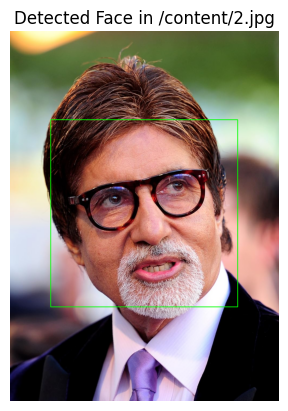

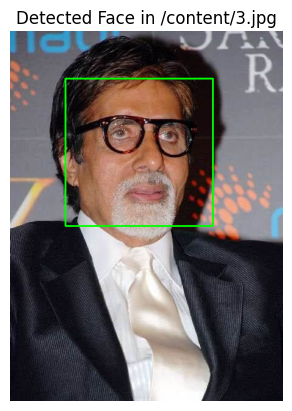

25-04-17 09:26:30 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 261MB/s]


Error extracting from VGG-Face: The layer sequential has never been called and thus has no defined input.
25-04-17 09:26:36 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 250MB/s]


25-04-17 09:26:41 - openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:00<00:00, 121MB/s] 


Error extracting from ArcFace: 'KerasHistory' object has no attribute 'layer'
max_sizes 128
(2, 128)


ValueError: n_components(4096) must be <= n_features(256).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# Image paths
image1_path = "/content/2.jpg"
image2_path = "/content/3.jpg"

models = ["VGG-Face", "Facenet", "OpenFace", "ArcFace"]

def detect_face(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        print(f"No face detected in {image_path}")
        return None, img
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Detected Face in {image_path}")
    plt.show()
    return faces, img

# Detect faces
detect_face(image1_path)
detect_face(image2_path)

def get_combined_embedding(image_path):
    embeddings = []
    embedding_sizes = []

    for model in models:
        try:
            result = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=False)
            embedding = np.array(result[0]['embedding'])
            embeddings.append(embedding)
            embedding_sizes.append(len(embedding))
        except Exception as e:
            print(f"Error extracting from {model}: {e}")

    if len(embeddings) == 0:
        return None

    # Normalize embedding sizes
    max_size = max(embedding_sizes)
    print("max_sizes",max_size)
    def resize_embedding(embedding, target_size):
        if len(embedding) < target_size:
            return np.pad(embedding, (0, target_size - len(embedding)), mode='constant')
        else:
            return embedding[:target_size]

    embeddings = np.array([resize_embedding(e, max_size) for e in embeddings])
    scaled_embeddings = embeddings
    print(scaled_embeddings.shape)
    # Step 2: Concatenate scaled embeddings
    concat_embedding = scaled_embeddings.flatten()
    # Optional: Also include average embedding
    avg_embedding = np.mean(scaled_embeddings, axis=0)

    # Optional: PCA embedding
    concat_embedding = scaled_embeddings.flatten().reshape(1, -1)  # shape (1, 16384)
    svd = TruncatedSVD(n_components=4096)  # Reduce to 4096 dims
    compressed_embedding = svd.fit_transform(concat_embedding).flatten()

    print("length",len(avg_embedding))
    print("length",len(concat_embedding))
    print("length",compressed_embedding.shape)

    return {
        # "fused": normalized_embedding,
        "fused": concat_embedding,
        "avg": avg_embedding
    }

# Get embeddings for both images
embedding1 = get_combined_embedding(image1_path)
embedding2 = get_combined_embedding(image2_path)

if embedding1 and embedding2:
    for method in ["fused", "avg", "pca"]:
        if len(embedding1[method]) == len(embedding2[method]):
            similarity = cosine_similarity([embedding1[method]], [embedding2[method]])[0][0]
            print(f"Cosine Similarity ({method} fusion): {similarity:.4f}")
        else:
            print(f"Skipping {method} due to size mismatch.")
